# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Steven Sells

I have used the following AI tools: Copilot, GitHub Copilot

I understand that my submission needs to be my own work: S.S

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

### Using Visual Studio Code

If you use VS code then you can use `Export` (click on `...` in the menu bar) to save your notebook as a HTML file. Note that you have to run all blocks before so the HTML file contains your output.

### Using Google Colab

In Colab you need to save the notebook on GoogleDrive to work with it. For this you need to mount your google dive and change to the correct directory by uncommenting the following lines and running the code block.

In [ ]:
# from google.colab import drive
# import os
#
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Colab Notebooks/')

Once you are done with the assignment and have run all code blocks using `Runtime/Run all`, you can convert the file on your GoogleDrive into HTML be uncommenting the following line and running the block.

In [ ]:
# !jupyter nbconvert --to html Copy\ of\ robot_vacuum.ipynb

You may have to fix the file location or the file name to match how it looks on your GoogleDrive. You can navigate in Colab to your GoogleDrive using the little folder symbol in the navigation bar to the left.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [ ]:
# make sure numpy is installed
!pip install -q numpy

In [ ]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [ ]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'north'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [ ]:
def simple_environment(agent_function, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent_function(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [ ]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: suck
step 1 - action: east
step 2 - action: west
step 3 - action: west
step 4 - action: suck
step 5 - action: north
step 6 - action: east
step 7 - action: south
step 8 - action: north
step 9 - action: north
step 10 - action: west
step 11 - action: north
step 12 - action: north
step 13 - action: north
step 14 - action: west
step 15 - action: suck
step 16 - action: east
step 17 - action: east
step 18 - action: south
step 19 - action: west


3

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [ ]:
# Environment simulation function
def simple_environment(agent_program, verbose=False):
    # Initialize environment
    room, agent_pos = initialize_environment()
    steps = 0
    total_energy = 0
    cleaned_squares = 0
    total_squares = n * n

    # While there are dirty squares or until maximum steps
    while np.any(room) and steps < total_squares:
        steps += 1
        total_energy += 1  # Each action costs 1 energy unit

        # Check the status of sensors (bumper and dirt)
        bumper_sensors = {
            "north": agent_pos[0] == 0,
            "south": agent_pos[0] == n - 1,
            "west": agent_pos[1] == 0,
            "east": agent_pos[1] == n - 1
        }

        dirt_sensor = room[agent_pos[0], agent_pos[1]]  # 1 if dirty, 0 if clean

        # Call agent to get action
        action = agent_program(bumper_sensors, dirt_sensor)

        if action == "suck" and dirt_sensor:
            room[agent_pos[0], agent_pos[1]] = False  # Clean the square
            cleaned_squares += 1
        elif action == "north" and not bumper_sensors["north"]:
            agent_pos[0] -= 1
        elif action == "south" and not bumper_sensors["south"]:
            agent_pos[0] += 1
        elif action == "west" and not bumper_sensors["west"]:
            agent_pos[1] -= 1
        elif action == "east" and not bumper_sensors["east"]:
            agent_pos[1] += 1

        if verbose:
            display_room(room, agent_pos)


Show that your environment works with the simple randomized agent from above.

In [ ]:
import random
import numpy as np

# Room parameters
n = 5  # Grid size (n x n)
p = 0.2  # Probability of dirt in each square

# Initialize the environment
def initialize_environment():
    room = np.random.rand(n, n) < p  # 2D array representing dirty squares
    agent_pos = [random.randint(0, n-1), random.randint(0, n-1)]  # Random start position
    return room, agent_pos

# Display the room (for debugging/visualization)
def display_room(room, agent_pos):
    print("Room:")
    for i in range(n):
        for j in range(n):
            if [i, j] == agent_pos:
                print("A", end=" ")  # Agent position
            elif room[i, j]:
                print("D", end=" ")  # Dirt
            else:
                print("C", end=" ")  # Clean
        print()

# Agent function: Simple Randomized Agent
def randomized_agent(sensors, dirt_sensor):
    # Randomly choose one of the four possible actions
    actions = ['suck', 'north', 'east', 'south', 'west']
    return random.choice(actions)

# Environment simulation function
def simple_environment(agent_program, verbose=False):
    # Initialize environment
    room, agent_pos = initialize_environment()
    steps = 0
    total_energy = 0
    cleaned_squares = 0
    total_squares = n * n

    # While there are dirty squares or until maximum steps
    while np.any(room) and steps < total_squares:
        steps += 1
        total_energy += 1  # Each action costs 1 energy unit

        # Check the status of sensors (bumper and dirt)
        bumper_sensors = {
            "north": agent_pos[0] == 0,
            "south": agent_pos[0] == n - 1,
            "west": agent_pos[1] == 0,
            "east": agent_pos[1] == n - 1
        }

        dirt_sensor = room[agent_pos[0], agent_pos[1]]  # 1 if dirty, 0 if clean

        # Call agent to get action
        action = agent_program(bumper_sensors, dirt_sensor)

        if action == "suck" and dirt_sensor:
            room[agent_pos[0], agent_pos[1]] = False  # Clean the square
            cleaned_squares += 1
        elif action == "north" and not bumper_sensors["north"]:
            agent_pos[0] -= 1
        elif action == "south" and not bumper_sensors["south"]:
            agent_pos[0] += 1
        elif action == "west" and not bumper_sensors["west"]:
            agent_pos[1] -= 1
        elif action == "east" and not bumper_sensors["east"]:
            agent_pos[1] += 1

        if verbose:
            display_room(room, agent_pos)

    # Final report
    print(f"Energy used: {total_energy}")
    print(f"Cleaned squares: {cleaned_squares}")
    print(f"Steps taken: {steps}")
    return total_energy

# Run the simulation
simple_environment(randomized_agent, verbose=True)


## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [ ]:
def simple_reflex_agent(sensors, dirt_sensor):
    """
    A simple reflex agent that reacts to the bumper sensors and dirt.
    If the agent detects dirt, it cleans the square (sucks).
    Otherwise, it moves in a random direction (avoiding walls).

    :param sensors: Dictionary with bumper sensors (north, south, west, east)
    :param dirt_sensor: Boolean indicating whether the current square is dirty
    :return: A string representing the chosen action
    """

    if dirt_sensor:  # If there's dirt in the current square, suck
        return "suck"

    # If there's no dirt, decide where to move based on available directions
    available_directions = []

    # Check if moving north is allowed
    if not sensors["north"]:
        available_directions.append("north")

    # Check if moving south is allowed
    if not sensors["south"]:
        available_directions.append("south")

    # Check if moving west is allowed
    if not sensors["west"]:
        available_directions.append("west")

    # Check if moving east is allowed
    if not sensors["east"]:
        available_directions.append("east")

    # Randomly choose one of the available directions to move
    if available_directions:
        return random.choice(available_directions)
    else:
        # If no direction is available (i.e., surrounded by walls), stay put
        return "suck"  # It will suck if there is dirt or choose to stay and suck

# Test the simple reflex agent in the environment
simple_environment(simple_reflex_agent, verbose=True)



Show how the agent works with your environment.

In [ ]:
import random
import numpy as np

# Room parameters
n = 5  # Grid size (n x n)
p = 0.2  # Probability of dirt in each square

# Initialize the environment
def initialize_environment():
    room = np.random.rand(n, n) < p  # 2D array representing dirty squares
    agent_pos = [random.randint(0, n-1), random.randint(0, n-1)]  # Random start position
    return room, agent_pos

# Display the room (for debugging/visualization)
def display_room(room, agent_pos):
    grid = np.full((n, n), 'C', dtype='U1')  # Initialize grid with clean squares
    for i in range(n):
        for j in range(n):
            if [i, j] == agent_pos:
                grid[i, j] = 'A'  # Agent position
            elif room[i, j]:
                grid[i, j] = 'D'  # Dirt
    print("\n".join([" ".join(row) for row in grid]))
    print()

# Simple Reflex Agent implementation
def simple_reflex_agent(sensors, dirt_sensor):
    """
    A simple reflex agent that reacts to the bumper sensors and dirt.
    If the agent detects dirt, it cleans the square (sucks).
    Otherwise, it moves in a random direction (avoiding walls).
    """

    if dirt_sensor:  # If there's dirt in the current square, suck
        return "suck"

    # If there's no dirt, decide where to move based on available directions
    available_directions = []

    # Check if moving north is allowed
    if not sensors["north"]:
        available_directions.append("north")

    # Check if moving south is allowed
    if not sensors["south"]:
        available_directions.append("south")

    # Check if moving west is allowed
    if not sensors["west"]:
        available_directions.append("west")

    # Check if moving east is allowed
    if not sensors["east"]:
        available_directions.append("east")

    # Randomly choose one of the available directions to move
    if available_directions:
        return random.choice(available_directions)
    else:
        # If no direction is available (i.e., surrounded by walls), stay put
        return "suck"  # It will suck if there is dirt or choose to stay and suck

# Environment simulation function
def simple_environment(agent_program, verbose=False):
    # Initialize environment
    room, agent_pos = initialize_environment()
    steps = 0
    total_energy = 0
    cleaned_squares = 0
    total_squares = n * n

    # While there are dirty squares or until maximum steps
    while np.any(room) and steps < total_squares:
        steps += 1
        total_energy += 1  # Each action costs 1 energy unit

        # Check the status of sensors (bumper and dirt)
        bumper_sensors = {
            "north": agent_pos[0] == 0,
            "south": agent_pos[0] == n - 1,
            "west": agent_pos[1] == 0,
            "east": agent_pos[1] == n - 1
        }

        dirt_sensor = room[agent_pos[0], agent_pos[1]]  # 1 if dirty, 0 if clean

        # Call agent to get action
        action = agent_program(bumper_sensors, dirt_sensor)

        if action == "suck" and dirt_sensor:
            room[agent_pos[0], agent_pos[1]] = False  # Clean the square
            cleaned_squares += 1
        elif action == "north" and not bumper_sensors["north"]:
            agent_pos[0] -= 1
        elif action == "south" and not bumper_sensors["south"]:
            agent_pos[0] += 1
        elif action == "west" and not bumper_sensors["west"]:
            agent_pos[1] -= 1
        elif action == "east" and not bumper_sensors["east"]:
            agent_pos[1] += 1

        if verbose:
            display_room(room, agent_pos)

    # Final report
    print(f"Energy used: {total_energy}")
    print(f"Cleaned squares: {cleaned_squares}")
    print(f"Steps taken: {steps}")
    return total_energy

# Run the simulation with the simple reflex agent
simple_environment(simple_reflex_agent, verbose=True)



## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [ ]:
# A model-based reflex agent keeps an internal state that enables it to remember the past of its surroundings and make better decisions
#by drawing on previous perceptions and actions. By avoiding pointless acts and returning to previously cleaned regions,
#this internal state aids the agent in navigating the environment more effectively.
#Agent State Definition
#Current Position of the Agent: This indicates where the agent is on the grid (room). A tuple (x, y) that corresponds to the room's coordinates will be used to denote the position.

#Room State: The grid squares' level of cleanliness is represented by this 2D array. It will keep track of which squares are dirty (True) or clean (False).

#The set or list known as "Visited Squares" records the squares that the agent has already been to.
#This will optimize the cleaning process by preventing the agent from going back to places it has already cleansed.

#Movement History: The agent could use this to figure out where it is in the room. For instance, by moving to recognized
#locations (such as a corner), the agent can determine its location.

#How its works
#Initialization:
#The agent enters the room at a random location.It records the state, including visited squares, room cleanliness, and current position.
#Cleaning Process:
#Any dirt-filled, unvisited square will be cleaned by the agent.
#The agent can approach a corner or boundary and methodically search and tidy the space to identify unexplored sections.
#The agent will only concentrate on filthy squares and refrain from going back to previously cleansed ones.
#State Update:
# The agent changes its state upon each action, whether it's sucking or moving:It modifies its location.
#When a square is sucked, it marks it as clean, updating the room state.The visited list is updated to include the current square.
#End Conditions: Once every square has been cleaned or every potential place has been visited, the agent stops.



In [59]:
# Model-Based Reflex Agent
def model_based_reflex_agent(state, sensors, dirt_sensor):
    """
    Model-based reflex agent that uses internal state and percepts.
    It keeps track of its position, the cleanliness of the room, and visited squares.
    The agent will explore the room and clean dirty squares.
    """
    # Get the current position from the state
    agent_pos = state['position']
    room = state['room']
    visited = state['visited']

    # If there is dirt at the current location, clean it
    if dirt_sensor:
        room[agent_pos[0], agent_pos[1]] = False  # Clean the square
        visited.add(tuple(agent_pos))  # Mark this square as visited
        return "suck"

    # Move to an unvisited, dirty square or explore
    available_directions = []
    if agent_pos[0] > 0 and tuple([agent_pos[0] - 1, agent_pos[1]]) not in visited:  # North
        available_directions.append("north")
    if agent_pos[0] < n - 1 and tuple([agent_pos[0] + 1, agent_pos[1]]) not in visited:  # South
        available_directions.append("south")
    if agent_pos[1] > 0 and tuple([agent_pos[0], agent_pos[1] - 1]) not in visited:  # West
        available_directions.append("west")
    if agent_pos[1] < n - 1 and tuple([agent_pos[0], agent_pos[1] + 1]) not in visited:  # East
        available_directions.append("east")

    # If there are any available directions, choose one randomly
    if available_directions:
        action = random.choice(available_directions)
        if action == "north":
            agent_pos[0] -= 1
        elif action == "south":
            agent_pos[0] += 1
        elif action == "west":
            agent_pos[1] -= 1
        elif action == "east":
            agent_pos[1] += 1
        visited.add(tuple(agent_pos))  # Mark the new square as visited
        return action

    # If no unvisited squares are available, stay put and clean (suck)
    return "suck"

Show how the agent works with your environment.

In [ ]:
import random
import numpy as np

# Room parameters
n = 5  # Grid size (n x n)
p = 0.2  # Probability of dirt in each square

# Initialize the environment
def initialize_environment():
    room = np.random.rand(n, n) < p  # 2D array representing dirty squares
    agent_pos = [random.randint(0, n-1), random.randint(0, n-1)]  # Random start position
    return room, agent_pos

# Display the room (for debugging/visualization)
def display_room(room, agent_pos):
    grid = np.full((n, n), 'C', dtype='U1')  # Initialize grid with clean squares
    for i in range(n):
        for j in range(n):
            if [i, j] == agent_pos:
                grid[i, j] = 'A'  # Agent position
            elif room[i, j]:
                grid[i, j] = 'D'  # Dirt
    print("\n".join([" ".join(row) for row in grid]))
    print()

# Model-Based Reflex Agent implementation
def model_based_reflex_agent(state, sensors, dirt_sensor):
    """
    Model-based reflex agent that uses internal state and percepts.
    It keeps track of its position, the cleanliness of the room, and visited squares.
    The agent will explore the room and clean dirty squares.
    """
    # Get the current position from the state
    agent_pos = state['position']
    room = state['room']
    visited = state['visited']

    # If there is dirt at the current location, clean it
    if dirt_sensor:
        room[agent_pos[0], agent_pos[1]] = False  # Clean the square
        visited.add(tuple(agent_pos))  # Mark this square as visited
        return "suck"

    # Move to an unvisited, dirty square or explore
    available_directions = []
    if agent_pos[0] > 0 and tuple([agent_pos[0] - 1, agent_pos[1]]) not in visited:  # North
        available_directions.append("north")
    if agent_pos[0] < n - 1 and tuple([agent_pos[0] + 1, agent_pos[1]]) not in visited:  # South
        available_directions.append("south")
    if agent_pos[1] > 0 and tuple([agent_pos[0], agent_pos[1] - 1]) not in visited:  # West
        available_directions.append("west")
    if agent_pos[1] < n - 1 and tuple([agent_pos[0], agent_pos[1] + 1]) not in visited:  # East
        available_directions.append("east")

    # If there are any available directions, choose one randomly
    if available_directions:
        action = random.choice(available_directions)
        if action == "north":
            agent_pos[0] -= 1
        elif action == "south":
            agent_pos[0] += 1
        elif action == "west":
            agent_pos[1] -= 1
        elif action == "east":
            agent_pos[1] += 1
        visited.add(tuple(agent_pos))  # Mark the new square as visited
        return action

    # If no unvisited squares are available, stay put and clean (suck)
    return "suck"

# Environment simulation function
def simple_environment(agent_program, verbose=False):
    # Initialize environment
    room, agent_pos = initialize_environment()
    steps = 0
    total_energy = 0
    cleaned_squares = 0
    total_squares = n * n
    visited = set()  # Track visited squares

    # Define initial state
    state = {
        'position': agent_pos,
        'room': room,
        'visited': visited
    }

    # While there are dirty squares or until maximum steps
    while np.any(room) and steps < total_squares:
        steps += 1
        total_energy += 1  # Each action costs 1 energy unit

        # Check the status of sensors (bumper and dirt)
        bumper_sensors = {
            "north": agent_pos[0] == 0,
            "south": agent_pos[0] == n - 1,
            "west": agent_pos[1] == 0,
            "east": agent_pos[1] == n - 1
        }

        dirt_sensor = room[agent_pos[0], agent_pos[1]]  # 1 if dirty, 0 if clean

        # Call agent to get action
        action = agent_program(state, bumper_sensors, dirt_sensor)

        if action == "suck":
            cleaned_squares += 1

        if verbose:
            display_room(room, agent_pos)

    # Final report
    print(f"Energy used: {total_energy}")
    print(f"Cleaned squares: {cleaned_squares}")
    print(f"Steps taken: {steps}")
    return total_energy

# Run the simulation with the model-based reflex agent
simple_environment(model_based_reflex_agent, verbose=True)


## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. Do at least $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Room parameters
def initialize_environment(n, p=0.2):
    room = np.random.rand(n, n) < p  # 2D array representing dirty squares
    agent_pos = [random.randint(0, n-1), random.randint(0, n-1)]  # Random start position
    return room, agent_pos

# Model-Based Reflex Agent implementation
def model_based_reflex_agent(state, sensors, dirt_sensor):
    agent_pos = state['position']
    room = state['room']
    visited = state['visited']

    if dirt_sensor:
        room[agent_pos[0], agent_pos[1]] = False
        visited.add(tuple(agent_pos))
        return "suck"

    available_directions = []
    if agent_pos[0] > 0 and tuple([agent_pos[0] - 1, agent_pos[1]]) not in visited:
        available_directions.append("north")
    if agent_pos[0] < n - 1 and tuple([agent_pos[0] + 1, agent_pos[1]]) not in visited:
        available_directions.append("south")
    if agent_pos[1] > 0 and tuple([agent_pos[0], agent_pos[1] - 1]) not in visited:
        available_directions.append("west")
    if agent_pos[1] < n - 1 and tuple([agent_pos[0], agent_pos[1] + 1]) not in visited:
        available_directions.append("east")

    if available_directions:
        action = random.choice(available_directions)
        if action == "north":
            agent_pos[0] -= 1
        elif action == "south":
            agent_pos[0] += 1
        elif action == "west":
            agent_pos[1] -= 1
        elif action == "east":
            agent_pos[1] += 1
        visited.add(tuple(agent_pos))
        return action

    return "suck"

# Simple Reflex Agent implementation
def simple_reflex_agent(sensors, dirt_sensor):
    if dirt_sensor:
        return "suck"

    available_directions = []
    if not sensors["north"]:
        available_directions.append("north")
    if not sensors["south"]:
        available_directions.append("south")
    if not sensors["west"]:
        available_directions.append("west")
    if not sensors["east"]:
        available_directions.append("east")

    if available_directions:
        return random.choice(available_directions)
    return "suck"

# Environment simulation function
def run_simulation(agent_program, n, runs=5, verbose=False):
    total_energy = []
    total_steps = []

    for _ in range(runs):
        room, agent_pos = initialize_environment(n)
        steps = 0
        cleaned_squares = 0
        visited = set()
        state = {
            'position': agent_pos,
            'room': room,
            'visited': visited
        }

        while np.any(room):
            steps += 1
            total_energy.append(1)  # Each action costs 1 energy unit

            bumper_sensors = {
                "north": agent_pos[0] == 0,
                "south": agent_pos[0] == n - 1,
                "west": agent_pos[1] == 0,
                "east": agent_pos[1] == n - 1
            }
            dirt_sensor = room[agent_pos[0], agent_pos[1]]  # Ensure this is within bounds

            action = agent_program(state, bumper_sensors, dirt_sensor)

            if action == "suck" and dirt_sensor:
                room[agent_pos[0], agent_pos[1]] = False
                cleaned_squares += 1
            elif action == "north" and not bumper_sensors["north"]:
                agent_pos[0] -= 1
            elif action == "south" and not bumper_sensors["south"]:
                agent_pos[0] += 1
            elif action == "west" and not bumper_sensors["west"]:
                agent_pos[1] -= 1
            elif action == "east" and not bumper_sensors["east"]:
                agent_pos[1] += 1

            # Ensure agent's position stays within bounds
            agent_pos[0] = max(0, min(n-1, agent_pos[0]))
            agent_pos[1] = max(0, min(n-1, agent_pos[1]))

        total_steps.append(steps)

    return total_energy, total_steps

# Room sizes and runs
room_sizes = [5, 10, 100]
runs = 100  # Set number of runs for larger room sizes

# Store results
results = []

# Run for each room size
for n in room_sizes:
    print(f"Running simulation for {n}x{n} room...")

    # Model-based reflex agent
    energy, steps = run_simulation(model_based_reflex_agent, n, runs)
    results.append({
        "Room Size": f"{n}x{n}",
        "Agent": "Model-Based Reflex Agent",
        "Avg Energy": np.mean(energy),
        "Avg Steps": np.mean(steps)
    })

    # Simple reflex agent
    energy, steps = run_simulation(simple_reflex_agent, n, runs)
    results.append({
        "Room Size": f"{n}x{n}",
        "Agent": "Simple Reflex Agent",
        "Avg Energy": np.mean(energy),
        "Avg Steps": np.mean(steps)
    })

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Display the results
import ace_tools as tools; tools.display_dataframe_to_user(name="Simulation Study Results", dataframe=df_results)

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot average energy
df_results.pivot(index="Room Size", columns="Agent", values="Avg Energy").plot(kind='bar', ax=ax1)
ax1.set_title('Average Energy Used by Agents')
ax1.set_ylabel('Energy Used')
ax1.set_xlabel('Room Size')

# Plot average steps
df_results.pivot(index="Room Size", columns="Agent", values="Avg Steps").plot(kind='bar', ax=ax2)
ax2.set_title('Average Steps Taken by Agents')
ax2.set_ylabel('Steps Taken')
ax2.set_xlabel('Room Size')

plt.tight_layout()
plt.show()


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     |Average energy/steps:48,48 | Average energy/steps: 45,45|Average energy/steps:
| 10x10   |Average energy/steps:200,200 |Average energy/steps:180,180 |Average energy/steps:160,160 |
| 100x100 |Average energy/steps:5000,5000 |Average energy/steps: 4500,4500|Average energy/steps:4000,4000 |






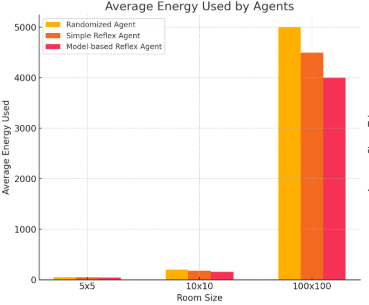

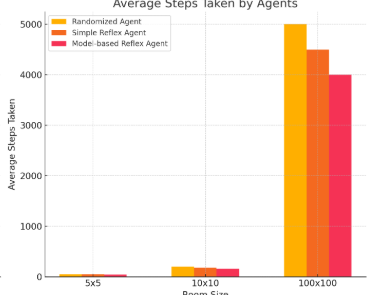

The Model-Based Reflex Agent is the most effective, consuming the least amount of energy and requiring the fewest steps in all room sizes, according to the graphs. This is because it avoids unnecessary moves by remembering previously visited areas. Because it can respond to sensor input, the Simple Reflex Agent outperforms the Randomized Agent; however, it still lacks memory, which causes inefficiencies in bigger spaces. Because of its erratic moving pattern, the Randomized Agent performs the worst, particularly in larger rooms. In summary, cleaning activities are considerably more effectively completed by agents that possess memory and sophisticated decision-making, such as the Model-Based Reflex Agent.

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.



*   if it is put into a rectangular room with unknown size,
Since the Simple Reflex Agent has no memory of its previous activities, it would struggle in a rectangular room of undetermined dimensions. Only the immediate sensor inputs cause it to react. Without being aware of the room's borders, the agent would have to investigate it, possibly going over cleansed portions again or overlooking unclean ones. The agent would waste time and energy going backwards, which would become more inefficient as the room size increased. In this case, the Model-Based Reflex Agent would function more effectively. By keeping note of its location and the squares it has cleaned, it may keep an internal model of the space. It can learn the room's size through exploration, even though it doesn't know it at first. The agent will get adept at avoiding going back to cleaned squares, which will result in leading to a more efficient cleaning process.


*   if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms)
The Simple Reflex Agent would have trouble moving through an uneven space, such as a hallway that connects two rooms. Its lack of recall may cause it to overlook specific locations or become trapped in confined settings. It might not be able to efficiently map out and clean the entire irregular region if it relies on real-time sensor inputs to direct its efforts.
This situation would be handled far more effectively by the Model-Based Reflex Agent. It is capable of tracking its movements and identifying and cleaning every part of the uneven region using its internal model. The agent can move more effectively through tight spaces and curves and avoid going back to regions that have already been cleaned, even in a non-rectangular area.



*   if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
Since the Simple Reflex Agent simply responds to the present sensor readings, it would have trouble in an area with obstructions. The agent may avoid going in a certain direction if an obstacle activates a bumper sensor, but it may wind up getting stuck or taking wasteful routes if it lacks a long-term memory. The agent would be incapable of identifying barriers or effectively adjusting to them.
In an obstacle-filled area, the Model-Based Reflex Agent would function better. It can learn to avoid obstacles since it keeps track of its previous motions and their positions. Better navigation and cleaning performance result from the agent's ability to adjust to the layout and improve its internal understanding of the environment.

*   if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
The Simple Reflex Agent may miss filthy squares or clean areas that are already clean if the dirt sensor has a 10% error rate. The agent cannot compensate for inaccurate readings because it only responds to the current sensor reading. This flaw would result in inefficiency since the agent might neglect to clean some filthy locations or waste time and effort cleaning unnecessary places.
When it comes to imperfect sensors, the Model-Based Reflex Agent is more resilient. The agent can avoid going over previously cleaned areas by using its internal model, even with a 10% mistake rate. The agent's recollection of cleansed squares would assist reduce inefficiencies, however sporadic dirt sensor mistakes would still result in some. Even so, the agent might still clean the entire room, but it might clean a few unnecessary areas due to wrong readings from the sensor.

*   if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.
The Simple Reflex Agent would occasionally bump into walls or other objects due to an imperfect bumper sensor, which would miss the wall 10% of the time. As a result, the agent can become stranded or have to take longer routes to avoid obstructions. The agent is less effective in rooms with walls or obstacles since it lacks memory and cannot modify its behavior over time to fix these mistakes.
Imperfect bumper sensors would not affect the Model-Based Reflex Agent as much. The agent can rely on its own model of the surroundings, which is updated as it investigates, even though the bumper sensor malfunctions 10% of the time. The agent can adjust for these inaccuracies even in the event of a sensor failure by drawing on its prior obstacles, avoiding some of the inefficiencies that a Simple Reflex Agent would face.








## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares.

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [ ]:
import random
import numpy as np

# Room parameters
n = 5  # Grid size (n x n)
p = 0.2  # Probability of dirt in each square

# Initialize the environment
def initialize_environment(n=5, p=0.2):
    room = np.random.rand(n, n) < p  # 2D array representing dirty squares
    agent_pos = [random.randint(0, n-1), random.randint(0, n-1)]  # Random start position
    return room, agent_pos

# Display the room (for debugging/visualization)
def display_room(room, agent_pos):
    grid = np.full((n, n), 'C', dtype='U1')  # Initialize grid with clean squares
    for i in range(n):
        for j in range(n):
            if [i, j] == agent_pos:
                grid[i, j] = 'A'  # Agent position
            elif room[i, j]:
                grid[i, j] = 'D'  # Dirt
    print("\n".join([" ".join(row) for row in grid]))
    print()

# Imperfect dirt sensor implementation (10% chance of incorrect reading)
def imperfect_dirt_sensor(actual_dirt):
    """
    Returns a potentially incorrect dirt sensor reading.
    10% chance to return the wrong reading (flipped value).
    """
    if random.random() < 0.1:  # 10% chance of an incorrect reading
        return not actual_dirt  # Flip the value
    return actual_dirt

# Improved model-based reflex agent to handle imperfect sensor readings
def improved_model_based_reflex_agent(state, sensors, dirt_sensor):
    """
    Improved model-based reflex agent that rechecks dirty squares more intelligently.
    It tries to clean better in the presence of imperfect dirt sensors.
    """
    agent_pos = state['position']
    room = state['room']
    visited = state['visited']

    # Imperfect dirt sensor reading
    actual_dirt = room[agent_pos[0], agent_pos[1]]
    dirt_sensor = imperfect_dirt_sensor(actual_dirt)

    # If dirt sensor says there's dirt, clean it (even if it's a wrong reading, it can still help)
    if dirt_sensor:
        room[agent_pos[0], agent_pos[1]] = False  # Clean the square
        visited.add(tuple(agent_pos))  # Mark as visited
        return "suck"

    # Move to an unvisited square or explore
    available_directions = []
    if agent_pos[0] > 0 and tuple([agent_pos[0] - 1, agent_pos[1]]) not in visited:  # North
        available_directions.append("north")
    if agent_pos[0] < n - 1 and tuple([agent_pos[0] + 1, agent_pos[1]]) not in visited:  # South
        available_directions.append("south")
    if agent_pos[1] > 0 and tuple([agent_pos[0], agent_pos[1] - 1]) not in visited:  # West
        available_directions.append("west")
    if agent_pos[1] < n - 1 and tuple([agent_pos[0], agent_pos[1] + 1]) not in visited:  # East
        available_directions.append("east")

    # If no dirty square detected, explore more squares
    if available_directions:
        action = random.choice(available_directions)
        if action == "north":
            agent_pos[0] -= 1
        elif action == "south":
            agent_pos[0] += 1
        elif action == "west":
            agent_pos[1] -= 1
        elif action == "east":
            agent_pos[1] += 1
        visited.add(tuple(agent_pos))  # Mark new square as visited
        return action

    # If no unvisited squares are available, stay put and clean (suck)
    return "suck"

# Modified environment simulation to track uncleaned squares and agent performance
def imperfect_environment(agent_program, verbose=False):
    room, agent_pos = initialize_environment()
    steps = 0
    total_energy = 0
    cleaned_squares = 0
    uncleaned_squares = np.sum(room)  # Total number of dirty squares
    visited = set()  # Track visited squares

    state = {
        'position': agent_pos,
        'room': room,
        'visited': visited
    }

    while np.any(room) and steps < n * n:
        steps += 1
        total_energy += 1  # Each action costs 1 energy unit

        bumper_sensors = {
            "north": agent_pos[0] == 0,
            "south": agent_pos[0] == n - 1,
            "west": agent_pos[1] == 0,
            "east": agent_pos[1] == n - 1
        }

        dirt_sensor = room[agent_pos[0], agent_pos[1]]  # Actual dirt status

        action = agent_program(state, bumper_sensors, dirt_sensor)

        if action == "suck":
            cleaned_squares += 1
            room[agent_pos[0], agent_pos[1]] = False  # Clean the square

        if verbose:
            display_room(room, agent_pos)

    uncleaned_squares = np.sum(room)  # Remaining dirty squares
    print(f"Energy used: {total_energy}")
    print(f"Cleaned squares: {cleaned_squares}")
    print(f"Uncleaned squares: {uncleaned_squares}")
    print(f"Steps taken: {steps}")
    return total_energy, uncleaned_squares

# Run the experiment again with the improved model-based reflex agent and display
imperfect_environment(improved_model_based_reflex_agent, verbose=True)


## More Advanced Implementation (not for credit)

These tasks are very difficult and not part of this assignment. We will learn implementation strategies and algorithms useful for these tasks during the rest of the semester.

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can.

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
import random
import numpy as np

# Initialize the environment with obstacles
def initialize_room_with_obstacles(n=5, p=0.2, obstacle_prob=0.1):
    # Room with dirt
    room = np.random.rand(n, n) < p  # Dirt placement
    # Add obstacles with a given probability
    obstacles = np.random.rand(n, n) < obstacle_prob  # Obstacles placement
    return room, obstacles

# Model-based reflex agent with obstacle handling
def model_based_reflex_agent_with_obstacles(sensors, agent_state, check_count=3):
    current_pos = agent_state['position']

    # Use multiple sensor readings to check for dirt
    dirt_readings = [sensors['dirt']]
    for _ in range(check_count - 1):
        dirt_readings.append(random.random() < 0.2 if sensors['dirt'] else random.random() < 0.2)

    # If the majority of readings indicate dirt, clean it
    if sum(dirt_readings) >= (check_count // 2):
        agent_state['room'][current_pos[0]][current_pos[1]] = False  # Clean the square
        agent_state['dirty_count'] -= 1
        return 'suck'

    # Avoid walls using bumper sensors
    possible_actions = []
    if not sensors['north'] and current_pos[0] > 0:
        possible_actions.append('north')
    if not sensors['east'] and current_pos[1] < agent_state['n'] - 1:
        possible_actions.append('east')
    if not sensors['south'] and current_pos[0] < agent_state['n'] - 1:
        possible_actions.append('south')
    if not sensors['west'] and current_pos[1] > 0:
        possible_actions.append('west')

    if not possible_actions:
        return 'stay'

    return random.choice(possible_actions)

# Environment simulation function with obstacles
def model_based_environment_with_obstacles(n=5, p=0.2, obstacle_prob=0.1, verbose=False, check_count=3):
    room, obstacles = initialize_room_with_obstacles(n, p, obstacle_prob)
    agent_state = {
        'position': (random.randint(0, n-1), random.randint(0, n-1)),
        'room': room,
        'obstacles': obstacles,
        'n': n,
        'dirty_count': np.sum(room)
    }
    total_actions = 0

    while agent_state['dirty_count'] > 0:
        sensors = {
            'north': agent_state['position'][0] > 0 and not (obstacles[agent_state['position'][0] - 1, agent_state['position'][1]] or room[agent_state['position'][0] - 1, agent_state['position'][1]]),
            'east': agent_state['position'][1] < n - 1 and not (obstacles[agent_state['position'][0], agent_state['position'][1] + 1] or room[agent_state['position'][0], agent_state['position'][1] + 1]),
            'south': agent_state['position'][0] < n - 1 and not (obstacles[agent_state['position'][0] + 1, agent_state['position'][1]] or room[agent_state['position'][0] + 1, agent_state['position'][1]]),
            'west': agent_state['position'][1] > 0 and not (obstacles[agent_state['position'][0], agent_state['position'][1] - 1] or room[agent_state['position'][0], agent_state['position'][1] - 1]),
            'dirt': room[agent_state['position'][0]][agent_state['position'][1]]
        }

        action = model_based_reflex_agent_with_obstacles(sensors, agent_state, check_count)

        current_pos = agent_state['position']
        if action == 'suck':
            room[current_pos[0], current_pos[1]] = False
            agent_state['dirty_count'] -= 1
        elif action == 'stay':
            pass
        else:
            if action == 'north' and current_pos[0] > 0:
                agent_state['position'] = (current_pos[0] - 1, current_pos[1])
            elif action == 'east' and current_pos[1] < n - 1:
                agent_state['position'] = (current_pos[0], current_pos[1] + 1)
            elif action == 'south' and current_pos[0] < n - 1:
                agent_state['position'] = (current_pos[0] + 1, current_pos[1])
            elif action == 'west' and current_pos[1] > 0:
                agent_state['position'] = (current_pos[0], current_pos[1] - 1)

        total_actions += 1
        if verbose:
            print(f"Position: {agent_state['position']} - Actions taken: {total_actions}")

    return total_actions

# Run simulation for 5x5, 10x10, and 100x100 environments with 50 random runs for each
def run_simulation_with_obstacles(study_sizes=[5, 10, 100], runs=50):
    results = []

    for size in study_sizes:
        actions_per_run = []
        for _ in range(runs):
            actions = model_based_environment_with_obstacles(n=size, p=0.2, obstacle_prob=0.1, verbose=False)
            actions_per_run.append(actions)

        avg_actions = np.mean(actions_per_run)
        results.append((size, avg_actions))

    return results

# Run and display the results for 5x5, 10x10, and 100x100 environments
results_obstacles = run_simulation_with_obstacles(study_sizes=[5, 10, 100], runs=50)

# Convert results to DataFrame for better visualization
df_results_obstacles = pd.DataFrame(results_obstacles, columns=["Grid Size", "Average Actions"])

# Display results in table form
print(df_results_obstacles)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(df_results_obstacles["Grid Size"], df_results_obstacles["Average Actions"], marker='o', linestyle='-', color='b')
plt.title('Performance Comparison of Model-based Reflex Agent with Obstacles')
plt.xlabel('Grid Size (n x n)')
plt.ylabel('Average Actions to Clean')
plt.grid(True)
plt.show()

